In [19]:
import numpy as np
import qiskit
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

# Qiskit imports:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city

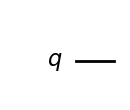

In [4]:
# Create a new circuit with one qubit
qc = QuantumCircuit(1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

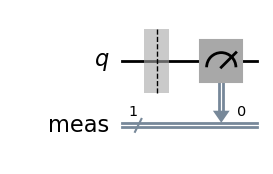

In [5]:
#setup to measure all the qubits on the output
qc.measure_all()
qc.draw("mpl")

In [6]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run the circuit for 10 trials, or "shots", and print out the results
result = simulator.run(qc,shots=10,memory=True).result()
memory = result.get_memory(qc)
print(memory)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


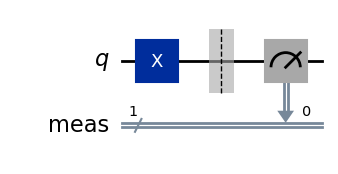

In [7]:
# Create a new circuit with one qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.draw("mpl")

In [8]:
# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run the circuit for 10 trials, or "shots", and print out the results
result = simulator.run(qc,shots=10,memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


In [9]:
# Create a new circuit with one qubit
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()

# Transpile for simulator
simulator = AerSimulator()
qc = transpile(qc, simulator)

# Run the circuit for 10 trials, or "shots", and print out the results
result = simulator.run(qc,shots=10,memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1', '0', '0', '1', '1', '0', '1', '1', '1', '1']


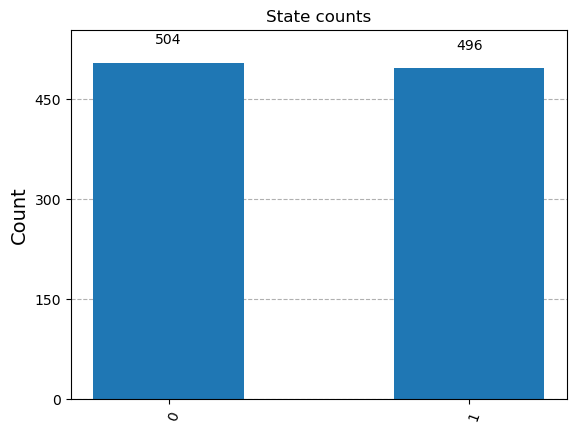

In [10]:
# Run and get counts in a histogram
result = simulator.run(qc,shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

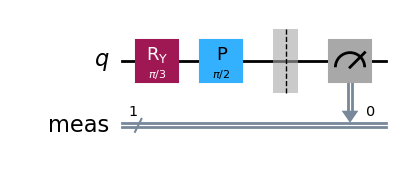

In [11]:
# Create a new circuit with one qubit
qc = QuantumCircuit(1)
qc.ry(np.pi/3,0)
qc.p(np.pi/2,0)
qc.measure_all()
qc.draw("mpl")

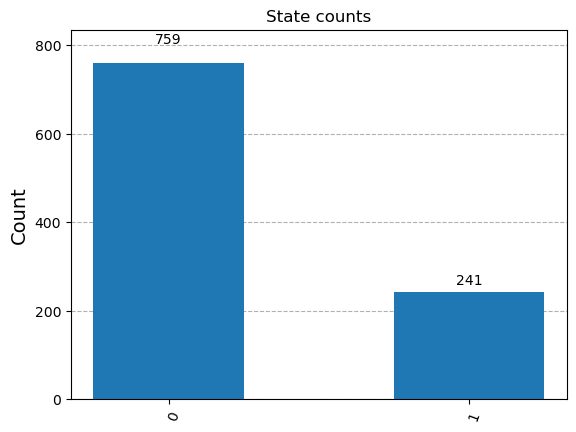

In [16]:
# Run and get counts in a histogram
result = simulator.run(qc,shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

Shots: 10, Error: 0.1000
Shots: 100, Error: 0.1100
Shots: 1000, Error: 0.0110
Shots: 10000, Error: 0.0009
Shots: 100000, Error: 0.0031


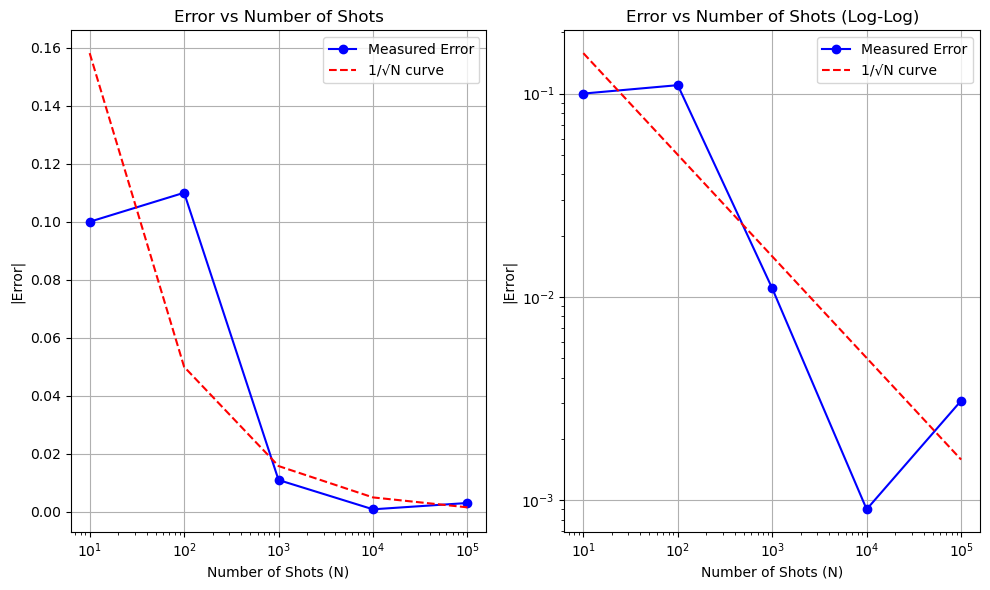

In [29]:
#Question 1: 

# Function to calculate error for a given number of shots
def calculate_error(num_shots):
    # Create circuit with Hadamard gate
    qc = QuantumCircuit(1)
    qc.h(0) 
    qc.measure_all()
    
    # Run simulation
    simulator = AerSimulator()
    qc = transpile(qc, simulator)
    result = simulator.run(qc, shots=num_shots).result()
    counts = result.get_counts(qc)
    
    # Calculate probabilities and error
    # Theoretical probability is 0.5 for both 0 and 1
    p0 = counts.get('0', 0)/num_shots
    error = abs(p0 - 0.5)
    return error

# Test different numbers of shots
shot_numbers = [10, 100, 1000, 10000, 100000]
errors = []

for shots in shot_numbers:
    error = calculate_error(shots)
    errors.append(error)
    print(f"Shots: {shots}, Error: {error:.4f}")

# Plot results
plt.figure(figsize=(10,6))

# Regular axes plot
plt.subplot(1,2,1)
plt.plot(shot_numbers, errors, 'bo-', label='Measured Error')
plt.plot(shot_numbers, [0.5/np.sqrt(N) for N in shot_numbers], 'r--', label='1/√N curve')
plt.xscale('log')
plt.xlabel('Number of Shots (N)')
plt.ylabel('|Error|')
plt.title('Error vs Number of Shots')
plt.legend()
plt.grid(True)

# Log-log plot
plt.subplot(1,2,2)
plt.loglog(shot_numbers, errors, 'bo-', label='Measured Error')
plt.loglog(shot_numbers, [0.5/np.sqrt(N) for N in shot_numbers], 'r--', label='1/√N curve')
plt.xlabel('Number of Shots (N)')
plt.ylabel('|Error|')
plt.title('Error vs Number of Shots (Log-Log)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

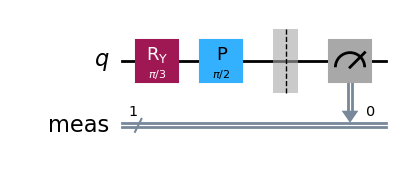

In [30]:
#Question 2:
# Create a new circuit with one qubit
qc = QuantumCircuit(1)
qc.ry(np.pi/3,0)
qc.p(np.pi/2,0)
qc.measure_all()
qc.draw("mpl")

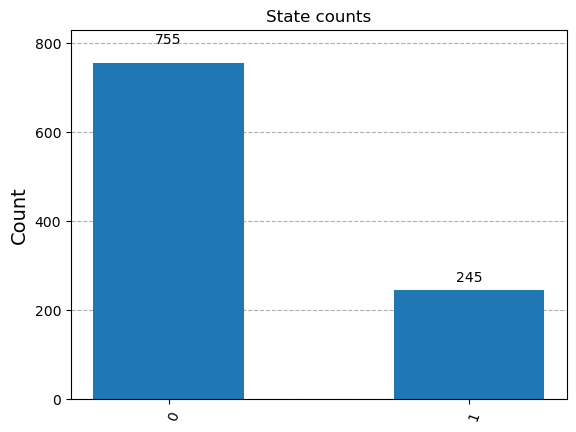

In [31]:
# Question2 continues: Run and get counts in a histogram
result = simulator.run(qc,shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='State counts')

In [34]:
#Question3: 

theta = np.pi/3
gamma = np.pi/2

state_after_RY = np.array([np.cos(theta/2), np.sin(theta/2)])

state_final = np.array([np.cos(theta/2), np.exp(1j*gamma)*np.sin(theta/2)])

prob_0 = np.abs(state_final[0])**2
prob_1 = np.abs(state_final[1])**2

print("Experimental Results:",counts)
print(f"Theoretical probability of |0⟩: {prob_0:.3f}")
print(f"Theoretical probability of |1⟩: {prob_1:.3f}")

Experimental Results: {'1': 245, '0': 755}
Theoretical probability of |0⟩: 0.750
Theoretical probability of |1⟩: 0.250
